In [1]:
import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.cluster.hierarchy import ward, dendrogram, average

%matplotlib inline

In [2]:
data = np.append(np.random.normal(1, 1, (10,2)), np.random.normal(10, 1, (10,2)), axis = 0)
print(data.shape)

(20, 2)


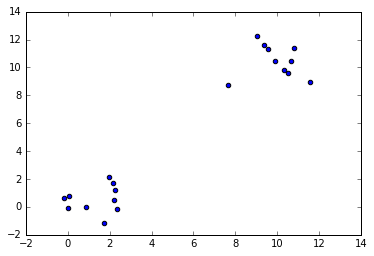

In [3]:
plt.scatter(data[:,0], data[:,1])

sklearn pairwise metrics can be used for distanes and similarities. 

http://scikit-learn.org/stable/modules/metrics.html#metrics

In [4]:
sim_cosine = cosine_similarity(data)
print(type(sim_cosine))
print(sim_cosine.shape)

<type 'numpy.ndarray'>
(20, 20)


In [5]:
# convert to distance
dist_cosine = 1-sim_cosine

In [6]:
dist_euc = euclidean_distances(data)

linkage matrix in scipy

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

Ward
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.ward.html

Avergae

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.average.html#scipy.cluster.hierarchy.average

In [7]:
linkage_matrix_ward = ward(dist_euc)
print(linkage_matrix_ward.shape)

(19, 4)


In [8]:
linkage_matrix_average = average(dist_euc)
print(linkage_matrix_average.shape)

(19, 4)


dendrogram

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

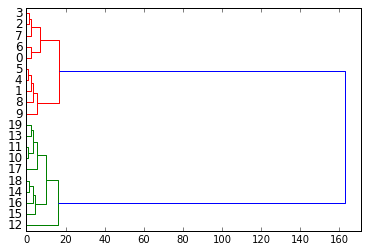

In [9]:
plt.show(dendrogram(linkage_matrix_ward, orientation= "right"))

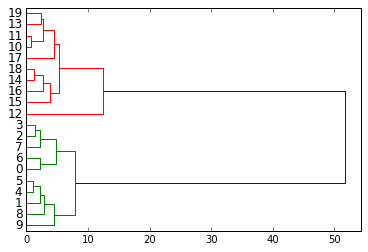

In [10]:
plt.show(dendrogram(linkage_matrix_average, orientation= "right"))

fcluster documentation
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [101]:
k = 2
clusters = fcluster(linkage_matrix_ward, k, criterion='maxclust')
print(clusters)

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


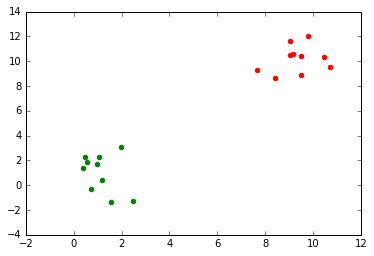

In [102]:
clust1 = data[np.where(clusters == 1)[0]]
plt.scatter(clust1[:,0], clust1[:,1], color = 'r')

clust2 = data[np.where(clusters == 2)[0]]
plt.scatter(clust2[:,0], clust2[:,1], color = 'g')

In [103]:
linkage_matrix_ward = ward(dist_cosine)
print(linkage_matrix_ward.shape)

linkage_matrix_average = average(dist_cosine)
print(linkage_matrix_average.shape)

(19, 4)
(19, 4)


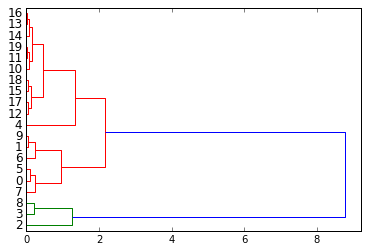

In [104]:
plt.show(dendrogram(linkage_matrix_ward, orientation= "right"))

In [106]:
k = 2
clusters = fcluster(linkage_matrix_ward, k, criterion='maxclust')
print(clusters)

[2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]


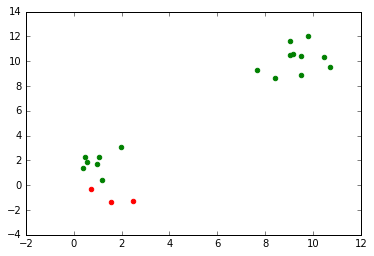

In [107]:
clust1 = data[np.where(clusters == 1)[0]]
plt.scatter(clust1[:,0], clust1[:,1], color = 'r')

clust2 = data[np.where(clusters == 2)[0]]
plt.scatter(clust2[:,0], clust2[:,1], color = 'g')